In [1]:
!pip install torchsummary
!pip install torchmetrics
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# train_filename = "/kaggle/input/playground-series-s3e24/train.csv"
# test_filename = "/kaggle/input/playground-series-s3e24/test.csv"
train_filename = "./train.csv"
test_filename = "./test.csv"

output_name = "./answers.csv"


# Binary Prediction of Smoker Status using Bio-Signals

This notebook contains solution for Binary Prediction of Smoker Status using Bio-Signals competition on Kaggle.com

# Part 1. Data analysis

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data downloading

1) Lets watch on some dataset rows

2) Lets explore if there are NaN or None values

In [4]:
def GetData(filename=train_filename):
  return pd.read_csv(filename, low_memory=False)

GetData()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [5]:
GetData().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [6]:
GetData().columns.tolist()

['id',
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'smoking']

In [7]:
num_cols = ['id',
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries'
]

cat_cols = [
]

feature_cols = num_cols + cat_cols
target_col = 'smoking'

In [9]:
def has_empty_string(row):
    return any(cell == ' ' or cell == '' or cell == np.nan for cell in row)

def FindDefectRows(data):
    return data.apply(has_empty_string, axis=1)

print(GetData().shape)

GetData()[FindDefectRows(GetData())]

(159256, 24)


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking


In [10]:
def DeleteDefectRows(data, delete=True):
    old_shape = data.shape[0]
    data = data.replace(' ', np.nan)
    data = data.replace('', np.nan)

    if (not delete):
        for column in num_cols:
            data[column] = pd.to_numeric(data[column], errors='coerce')
            average_value = data[column].mean()
            data[column].fillna(average_value, inplace=True)

    data = data.dropna()
    new_shape = data.shape[0]
    delta = old_shape - new_shape
    print(delta, 'rows were deleted,', new_shape, 'remains')
    return data

def GetClearData(filename=train_filename, delete=True):
    return DeleteDefectRows(GetData(filename), delete)

GetClearData(train_filename, False)

0 rows were deleted, 159256 remains


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


As we can see, there are non string or NaN or None values, which is very great and convenient for further analysis!!!

# Part 2. Data Analysis part

1) Lets build hystogram for numerical features

2) Lets the target variable distribution

0 rows were deleted, 159256 remains


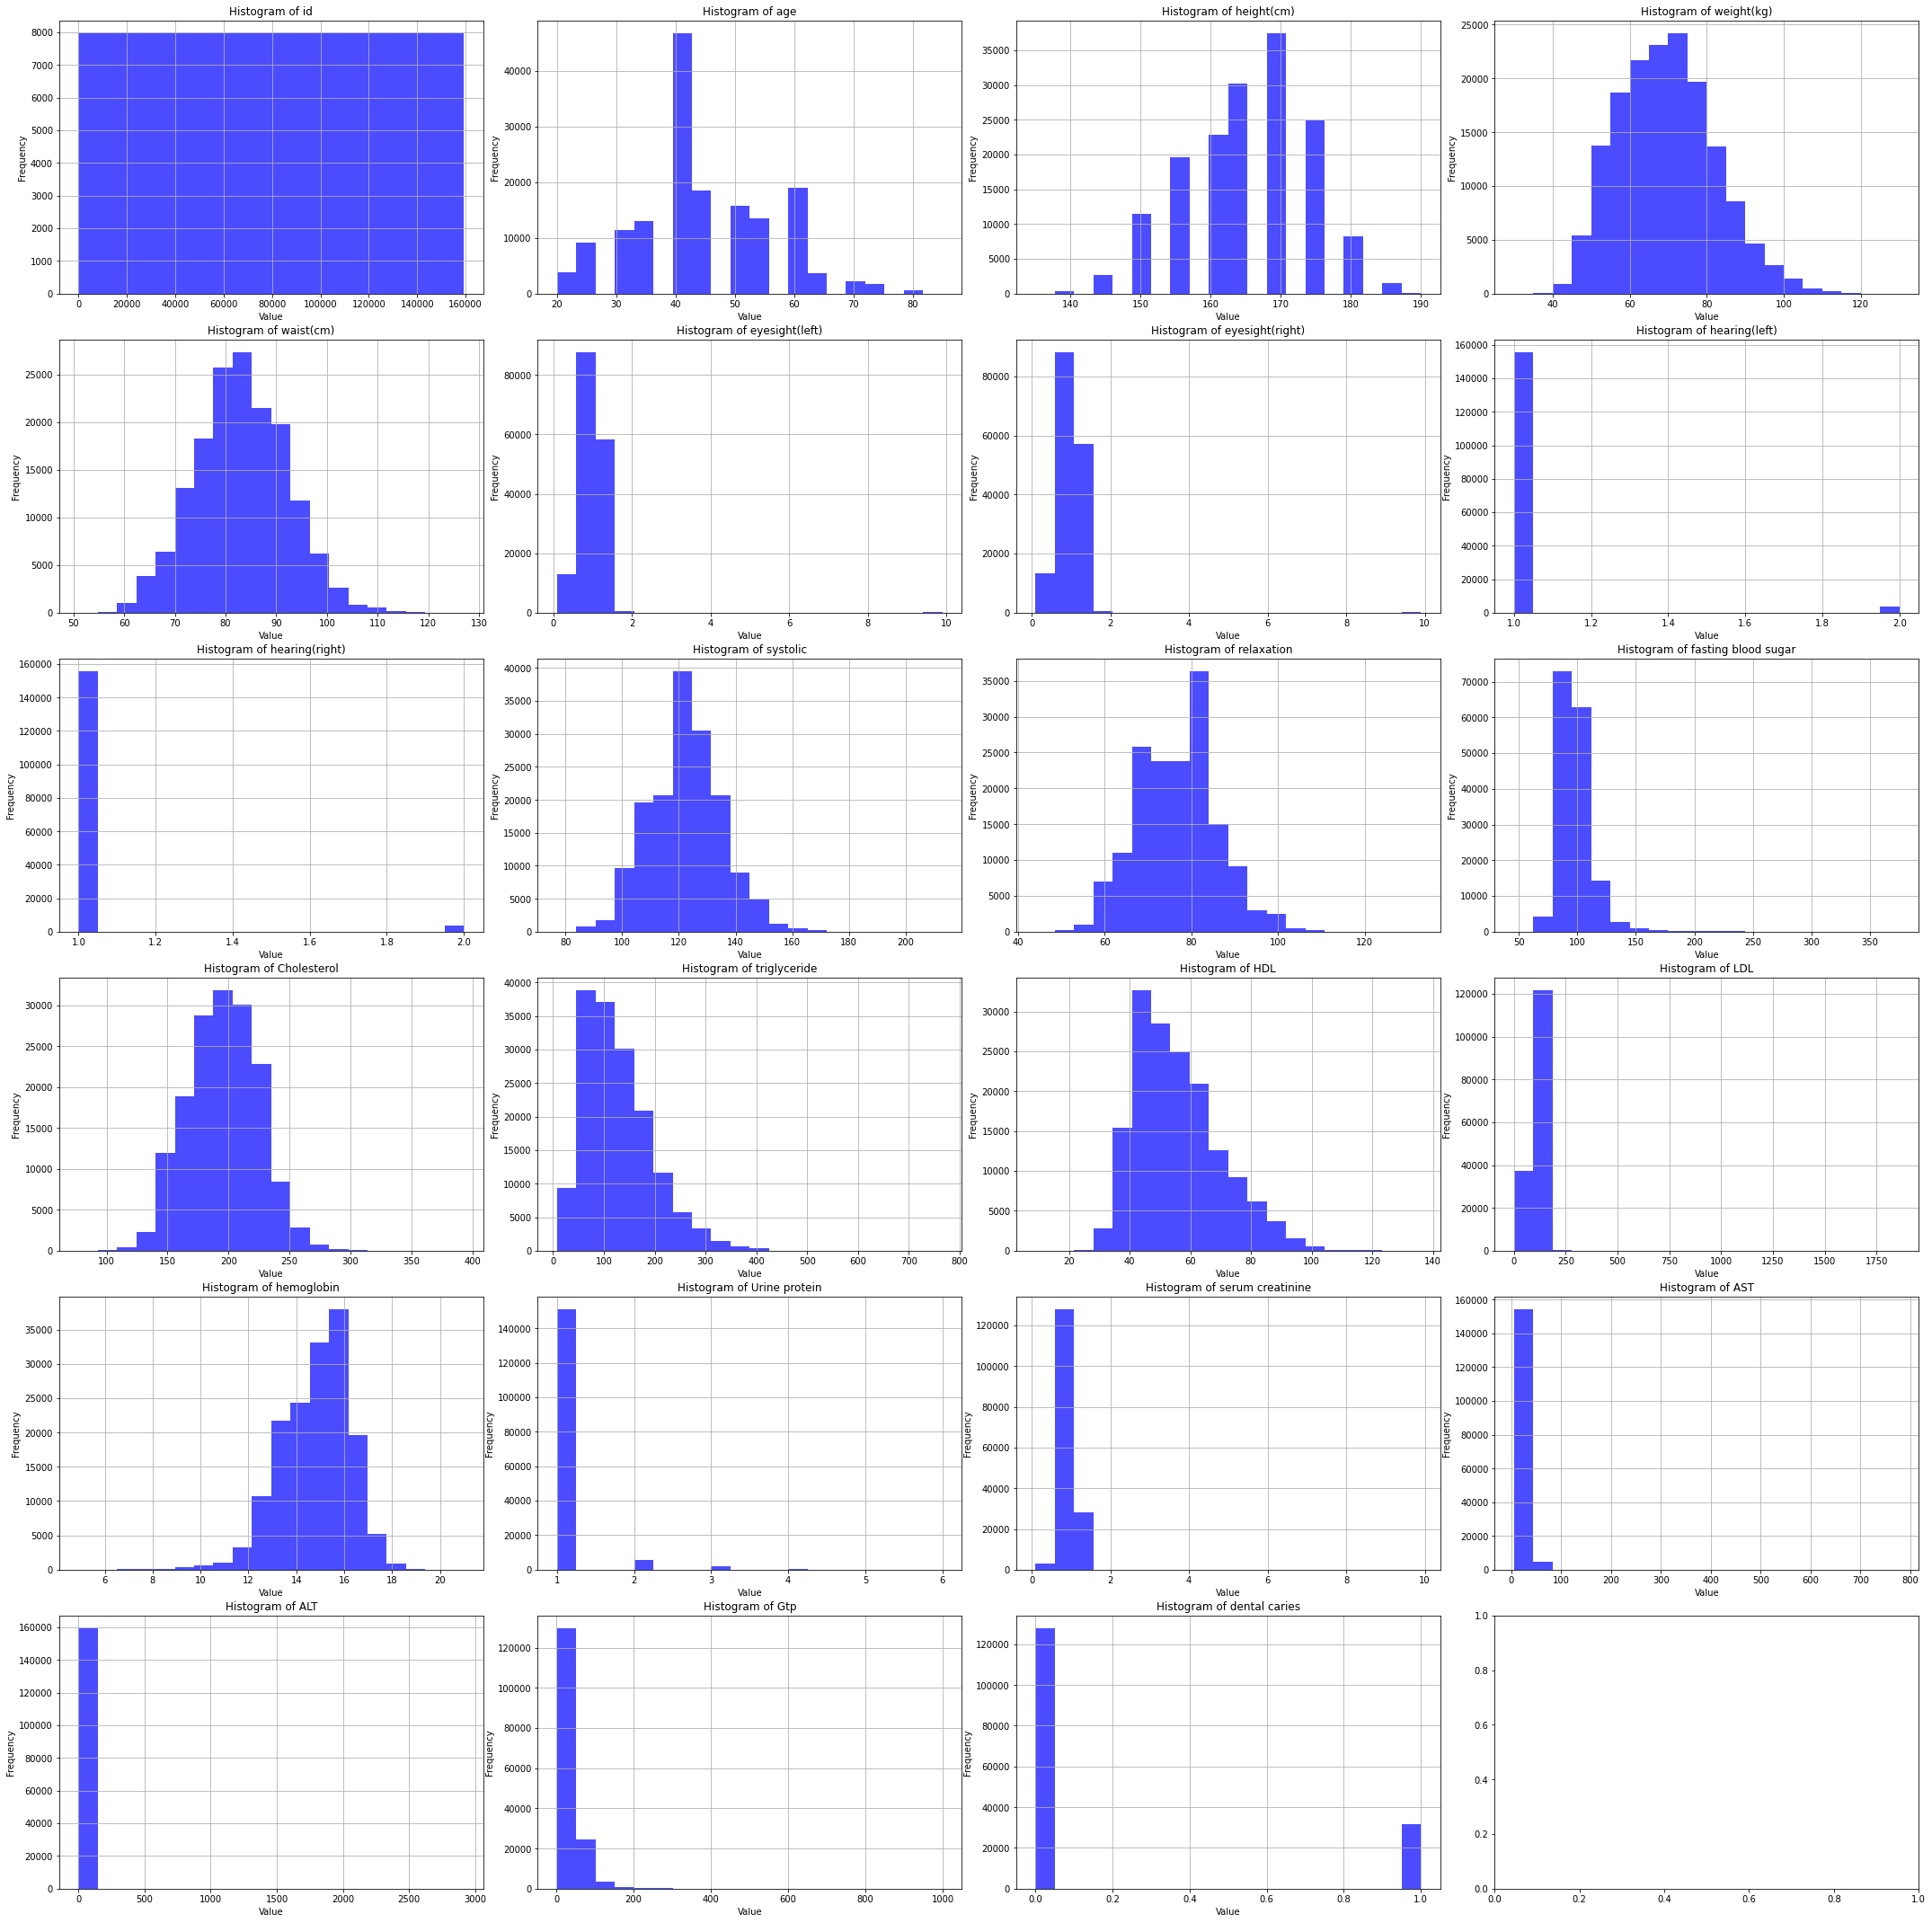

In [11]:
fig, axs = plt.subplots(6, 4, figsize=(30, 30))
axs = axs.flatten()
fig.tight_layout(pad=3.0)

data = GetClearData(train_filename, False)

for i, feature_name in enumerate(num_cols):
    axs[i].hist(data[feature_name], bins=20, color='blue', alpha=0.7)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {feature_name}')
    axs[i].grid(True)

plt.show()

0 rows were deleted, 159256 remains


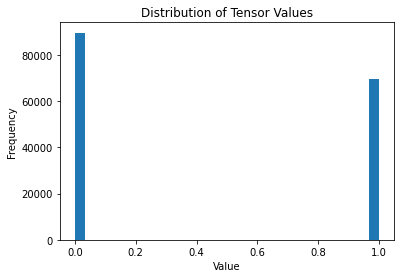

In [12]:
numpy_array = GetClearData(train_filename, False)[target_col].values

plt.hist(numpy_array, bins=30)
plt.title("Distribution of Tensor Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

As we can see from a previous plot, our class is almost balanced, so lets not further use techniques which we usually use with unbalanced classes

# Part 3. Linear Regression

Lets see, how well does linear regression work

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [14]:
def Scale(X_train, X_test):
    scaler = StandardScaler()
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()
    X_train_copy[num_cols] = scaler.fit_transform(X_train_copy[num_cols])
    X_test_copy[num_cols] = scaler.transform(X_test_copy[num_cols])
    return X_train_copy, X_test_copy

def ScaleSingle(X_train):
    scaler = StandardScaler()
    X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
    return X_train

def Split(data):
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    return X, y

X, y = Split(GetClearData(train_filename, False))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = Scale(X_train, X_test)
X_train

0 rows were deleted, 159256 remains


/home/stepa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/stepa/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/home/stepa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
60700,-0.408001,-0.363764,-1.729695,-1.361653,-0.333247,-1.261648,-1.278404,-0.156031,-0.154653,-0.194342,...,-1.201312,0.296177,-0.197121,-2.090771,-0.213745,-1.626365,-1.190789,-0.851755,-0.871202,-0.497426
44065,-0.769588,1.750195,-1.729695,-1.361653,-1.563035,-0.762843,-0.002432,-0.156031,-0.154653,1.298727,...,-0.446249,0.797395,0.258438,1.052672,-0.213745,-1.626365,-0.880976,-0.139049,-0.358082,-0.497426
39538,-0.867989,0.904612,-1.162983,-0.963707,-0.333247,0.484171,0.507957,-0.156031,-0.154653,-1.058751,...,-1.246616,-0.563054,-0.652681,-0.973102,-0.213745,-1.626365,-0.674434,-0.632461,-0.646712,-0.497426
105427,0.564210,0.904612,-0.596270,-0.565762,0.002149,-0.762843,-0.512820,-0.156031,-0.154653,0.591484,...,-0.672768,-0.133439,1.555031,-0.134851,-0.213745,-1.071018,-1.190789,-0.742108,-0.326012,-0.497426
148669,1.504141,-1.209348,1.670580,1.821910,1.343736,-0.014635,0.507957,-0.156031,-0.154653,-0.194342,...,-0.159325,-0.133439,-1.003112,-0.693685,-0.213745,0.039675,-0.054807,0.189892,-0.486362,-0.497426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.878346,-1.209348,1.670580,1.026020,0.561144,0.484171,0.507957,-0.156031,-0.154653,-0.980168,...,1.154484,-0.992669,0.994342,0.354129,-0.213745,0.595022,1.597530,3.314834,0.924716,-0.497426
103694,0.526540,-0.363764,-0.029558,-0.167816,-0.445046,1.232379,0.507957,-0.156031,-0.154653,1.613058,...,0.429624,-0.563054,-0.862939,0.773255,-0.213745,0.039675,-0.158078,-0.029402,0.539877,2.010351
131932,1.140337,0.059028,-0.596270,-0.565762,-0.221448,-0.014635,-0.002432,-0.156031,-0.154653,-1.765994,...,-0.521756,1.298613,-1.423628,-0.693685,-0.213745,-1.626365,-0.467892,-0.742108,-0.710852,-0.497426
146867,1.464972,1.327404,0.537155,1.423965,1.567333,0.484171,1.273540,-0.156031,-0.154653,0.984397,...,-0.627464,-0.992669,0.048180,0.144566,-0.213745,0.595022,0.771361,1.450834,0.122967,-0.497426


In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((127404, 23), (127404,), (31852, 23), (31852,))

In [15]:
param_grid = {
    'C': np.linspace(1, 100, 5),
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000),
                           param_grid, cv=5,
                           scoring='roc_auc')

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict_proba(X_test)[:, 1]

print(grid_search.best_params_)
roc_auc_score(pd.DataFrame(y_test).values, pd.DataFrame(y_pred).values)

{'C': 100.0}


0.8319381129373031

In [16]:
clf = LogisticRegression(C=100.0, max_iter=1000)
clf.fit(X_train, y_train)


test_data = GetClearData(test_filename, False)
test_data = ScaleSingle(test_data)

final_pred = clf.predict_proba(test_data)
final_pred = [pair[1] for pair in final_pred]
pd.DataFrame(final_pred).head(20)
# df = pd.DataFrame({'id': range(159256, 265426 + 1),
#                    'smoking': final_pred})

# df.to_csv(output_name, index=False)

0 rows were deleted, 106171 remains


,0
0,0.398327
1,0.200352
2,0.641999
3,0.128431
4,0.656032
5,0.784984
6,0.245661
7,0.110611
8,0.125212
9,0.074698


Using linear regression we were able to achive:

roc_auc: 0.83824

# Part 4. CatBoost + GridSearchCV

Lets see how good gradient boosting completes this task without any data cleaning

We will use catboost even though we don't have any categorical features

In [17]:
!pip3 install catboost

Defaulting to user installation because normal site-packages is not writeable


In [97]:
import catboost
from catboost import CatBoostClassifier, CatBoostRegressor

In [19]:
X, y = Split(GetClearData(train_filename, False))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0 rows were deleted, 159256 remains


In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((127404, 23), (127404,), (31852, 23), (31852,))

Lets use GridSearchCV + Catboost to get better parameters for our gradient boosting

In [21]:
param_grid = {
    'iterations': [50, 70],
    'depth': [5, 6],
    'learning_rate': [0.08, 0.1],
}

grid_search = GridSearchCV(CatBoostClassifier(verbose=2, eval_metric='AUC', cat_features=cat_cols),
                           param_grid, cv=5,
                           scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

y_pred = grid_search.predict_proba(X_test)[:, 1]
roc_auc_score(pd.DataFrame(y_test).values, pd.DataFrame(y_pred).values)

0:	total: 56.5ms	remaining: 3.9s
2:	total: 71.2ms	remaining: 1.59s
4:	total: 85.6ms	remaining: 1.11s
6:	total: 99.9ms	remaining: 899ms
8:	total: 115ms	remaining: 777ms
10:	total: 129ms	remaining: 693ms
12:	total: 144ms	remaining: 633ms
14:	total: 160ms	remaining: 585ms
16:	total: 174ms	remaining: 544ms
18:	total: 190ms	remaining: 510ms
20:	total: 205ms	remaining: 479ms
22:	total: 220ms	remaining: 449ms
24:	total: 235ms	remaining: 422ms
26:	total: 248ms	remaining: 395ms
28:	total: 263ms	remaining: 372ms
30:	total: 278ms	remaining: 349ms
32:	total: 292ms	remaining: 328ms
34:	total: 307ms	remaining: 307ms
36:	total: 322ms	remaining: 287ms
38:	total: 336ms	remaining: 267ms
40:	total: 350ms	remaining: 247ms
42:	total: 364ms	remaining: 229ms
44:	total: 379ms	remaining: 210ms
46:	total: 394ms	remaining: 193ms
48:	total: 408ms	remaining: 175ms
50:	total: 422ms	remaining: 157ms
52:	total: 437ms	remaining: 140ms
54:	total: 452ms	remaining: 123ms
56:	total: 467ms	remaining: 107ms
58:	total: 481ms

0.8569365354300692

In [22]:
# hyperparameters which were calculated during 1h search with optuna on a local machine
best_params = {'iterations': 400, 'depth': 7, 'learning_rate': 0.11}
best_model = CatBoostClassifier(**best_params, verbose=0, eval_metric='AUC', cat_features=cat_cols)
X, y = Split(GetClearData(train_filename, False))

best_model.fit(X, y)

test_data = GetClearData(test_filename, False)


final_pred = best_model.predict_proba(test_data)
final_pred = [pair[1] for pair in final_pred]
pd.DataFrame(final_pred).head(20)

# df = pd.DataFrame({'id': range(159256, 265426 + 1),
#                    'smoking': final_pred})

# df.to_csv(output_name, index=False)

0 rows were deleted, 159256 remains
0 rows were deleted, 106171 remains


,0
0,0.537705
1,0.181015
2,0.287753
3,0.023911
4,0.534587
5,0.938942
6,0.446448
7,0.049100
8,0.105971
9,0.045467


# Part 5. XGBoost + optuna

Lets also test xgboost + optuna combination

In [23]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable


In [89]:
import optuna
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 7500, 12000, step=100),
        "max_depth":trial.suggest_int("max_depth", 4, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 7, 8),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-2, 10.),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-2, 10.),
        "gamma": trial.suggest_float("gamma", 0.7, 1.0, step=0.1),
    }
    model = xgb.XGBClassifier(
        **params,
        n_jobs=-1,
        tree_method='hist',
        gpu_id=0
    )

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)

    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

best_params = study.best_params
best_roc_auc = study.best_value

print("Best Hyperparameters:", best_params)
print("Best ROC AUC:", best_roc_auc)

# Train a model with the best hyperparameters
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict_proba(X_test)[:, 1]
final_roc_auc = roc_auc_score(y_test, y_pred)

print("Final ROC AUC with Best Hyperparameters:", final_roc_auc)


In [ ]:
# hyperparameters which were calculated during 5h search with optuna on a local machine
best_params = {'n_estimators': 8500, 'max_depth': 6, 'min_child_weight': 7, 'learning_rate': 0.01562020794850652, 'subsample': 0.9936797243169001, 'colsample_bytree': 0.16999716191331965, 'reg_alpha': 3.4576146388015996, 'reg_lambda': 5.597056682360282, 'gamma': 0.8999999999999999}
best_model = xgb.XGBClassifier(**best_params)
X, y = Split(GetClearData(train_filename, False))

best_model.fit(X, y)

test_data = GetClearData(test_filename, False)


final_pred = best_model.predict_proba(test_data)
final_pred = [pair[1] for pair in final_pred]
pd.DataFrame(final_pred).head(20)

# df = pd.DataFrame({'id': range(159256, 265426 + 1),
#                    'smoking': final_pred})

# df.to_csv(output_name, index=False)

# Part 6. Dense neural network

Since our data can not be linearly-classified or solved well by gradient boosting/trees, lets use some neural networks to solve out dataset. Lets try dense neural networks first

In [73]:
X, y = Split(GetClearData(train_filename, False))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = Scale(X_train, X_test)

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F

from torch.utils.data import TensorDataset, DataLoader

import os
from torchvision.datasets import MNIST
from torchvision import transforms as tfs
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.metrics import roc_auc_score

sns.set(style="darkgrid", font_scale=1.4)

lets see what device are we going to train our network on:

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [67]:
class CustomDataset(Dataset):
    def __init__(self, X, y, has_target: bool):
        self.has_target = has_target
        self.data_features = pd.DataFrame(X)
        self.data_target = pd.DataFrame(y)
        print("Downloaded dataset with size: ", self.data_features.shape)

    def __len__(self):
        return len(self.data_features)

    def __getitem__(self, idx):
        features = torch.tensor(self.data_features.iloc[idx].values, dtype=torch.float32)
        if (self.has_target):
            target = torch.tensor(self.data_target.iloc[idx].values, dtype=torch.int64)
        else:
            target = torch.tensor(-1, dtype=torch.int64)

        features = features.to(device)
        target = target.to(device)
        
        return features, target

class NeuralNetwork:
    def __init__(self, num_epochs=10, activation=nn.ELU, criterion=nn.CrossEntropyLoss(), batch_size=128):
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.criterion = criterion
        self.features = 23  # number of flattened array
        self.classes = 2    # number of classes

        self.model = nn.Sequential(
          nn.Flatten(),
          nn.Linear(self.features, 256),
          activation(),
          nn.Linear(256, 256),
          activation(),
          nn.Linear(256, 128),
          activation(),
          nn.Linear(128, self.classes),
          # don't need softmax here!
        )
        
    def summary(self):
        summary(self.model, (self.features,), batch_size=self.batch_size)
        
    def fit(self, X_train, y_train, X_test, y_test):
        """
            X_train, X_test should be scaled!!! 
            X_test used only for roc_auc monitoring
        """
        

        train_dataset = CustomDataset(X_train, y_train, True)
        test_dataset = CustomDataset(X_test, y_test, True)

        train_dataloader = DataLoader(train_dataset, batch_size=self.batch_size, drop_last=True, shuffle=False)
        test_dataloader = DataLoader(test_dataset, batch_size=self.batch_size, drop_last=True, shuffle=False)
        
        print("-----DATA SAMPLES:  ---------")
        print("------train-----")
        for x, y in train_dataloader:
            print(x.shape)
            print(x[0])
            print(x.dtype)
            print(y.dtype)
            print(y[0])
            break
        print("------test-----")
        for x, y in test_dataloader:
            print(x.shape)
            print(x[0])
            print(x.dtype)
            print(y.dtype)
            print(y[0])
            break
        
        print("\n\n\n")
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)

        loaders = {"train": train_dataloader, "test": test_dataloader}
        accuracy = {"train": [], "test": []}
        for epoch in range(self.num_epochs):
            for k, dataloader in loaders.items():
                epoch_correct = 0
                epoch_all = 0
                predictions = []
                labels = []
                for x_batch, y_batch in dataloader:
                    y_batch = y_batch.view(128)
                    if k == "train":
                        self.model.train()
                        optimizer.zero_grad()
                        outp = self.model(x_batch)
                    else:
                        self.model.eval()
                        with torch.no_grad():
                            outp = self.model(x_batch)
                    preds = outp.argmax(-1)
                    prob = nn.Softmax(dim=1)(outp)
                    predictions.extend(prob[:, 1].tolist())
                    labels.extend(y_batch.tolist())
                    epoch_correct += (preds == y_batch).sum().item()
                    epoch_all += self.batch_size
                    if k == "train":
                        loss = self.criterion(outp, y_batch)
                        loss.backward()
                        optimizer.step()
                if k == "train":
                    print(f"Epoch: {epoch+1}")
                current_roc_auc = roc_auc_score(labels, predictions)
                print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
                print(f"Loader: {k}. roc_auc: {current_roc_auc}")
                accuracy[k].append(current_roc_auc)
        return accuracy
    
    def predict_proba(self, X_test):
        test_dataset = CustomDataset(X_test, [], False)
        test_dataloader = DataLoader(test_dataset, batch_size=X_test.shape[0], drop_last=True, shuffle=False)
        predictions = []
        self.model.eval()
        for x_batch, y_batch in test_dataloader:
            with torch.no_grad():
                outp = self.model(x_batch)
            prob = nn.Softmax(dim=1)(outp)[:, 1]
            predictions.extend(prob.tolist())
        return predictions

In [69]:
dense_neural_network_elu = NeuralNetwork(num_epochs=5, activation=nn.ELU, criterion=nn.CrossEntropyLoss(), batch_size=128)
dense_neural_network_elu.summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [128, 23]               0
            Linear-2                 [128, 256]           6,144
               ELU-3                 [128, 256]               0
            Linear-4                 [128, 256]          65,792
               ELU-5                 [128, 256]               0
            Linear-6                 [128, 128]          32,896
               ELU-7                 [128, 128]               0
            Linear-8                   [128, 2]             258
Total params: 105,090
Trainable params: 105,090
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 1.27
Params size (MB): 0.40
Estimated Total Size (MB): 1.69
----------------------------------------------------------------


As we can see from output above, our model consists of ~1e5 neurons, which is optimal number for our types of tasks

In [70]:
roc_auc_elu = dense_neural_network_elu.fit(X_train, y_train, X_test, y_test)

Downloaded dataset with size:  (127404, 23)
Downloaded dataset with size:  (31852, 23)
Epoch: 1
Loader: train. Accuracy: 0.7637170226130653
Loader: train. roc_auc: 0.8465326897083711
Loader: test. Accuracy: 0.7599546370967742
Loader: test. roc_auc: 0.8472279972847494


Lets see how does dense neural network work with another activation functions

In [29]:
class Identical(nn.Module):
    def forward(self, x):
        return x

In [34]:
def test_activation_function(activation):
    print("Activation function to test: ", activation)
    neural_network = NeuralNetwork(num_epochs=5, activation=activation)
    return neural_network.fit(X_train, y_train, X_test, y_test)

In [35]:
roc_auc_identical = test_activation_function(Identical)
roc_auc_elu = test_activation_function(nn.ELU)
roc_auc_relu = test_activation_function(nn.ReLU)
roc_auc_leaky_relu = test_activation_function(nn.LeakyReLU)
roc_auc_tanh = test_activation_function(nn.Tanh)
roc_auc_sigmoid = test_activation_function(nn.Sigmoid)

Activation function to test:  <class '__main__.Identical'>
Downloaded dataset with size:  (127404, 23)
Downloaded dataset with size:  (31852, 23)
Epoch: 1
Loader: train. Accuracy: 0.7467650753768844
Loader: train. roc_auc: 0.8311946102282312
Loader: test. Accuracy: 0.7448336693548387
Loader: test. roc_auc: 0.8309748904665507
Epoch: 2
Loader: train. Accuracy: 0.7481469849246232
Loader: train. roc_auc: 0.8329955013516802
Loader: test. Accuracy: 0.7450226814516129
Loader: test. roc_auc: 0.8312062801888607
Epoch: 3
Loader: train. Accuracy: 0.7482569095477387
Loader: train. roc_auc: 0.833294582756171
Loader: test. Accuracy: 0.745085685483871
Loader: test. roc_auc: 0.8314883350810671
Activation function to test:  <class 'torch.nn.modules.activation.ELU'>
Downloaded dataset with size:  (127404, 23)
Downloaded dataset with size:  (31852, 23)
Epoch: 1
Loader: train. Accuracy: 0.7633951005025126
Loader: train. roc_auc: 0.8462375432474392
Loader: test. Accuracy: 0.7624432963709677
Loader: test. r

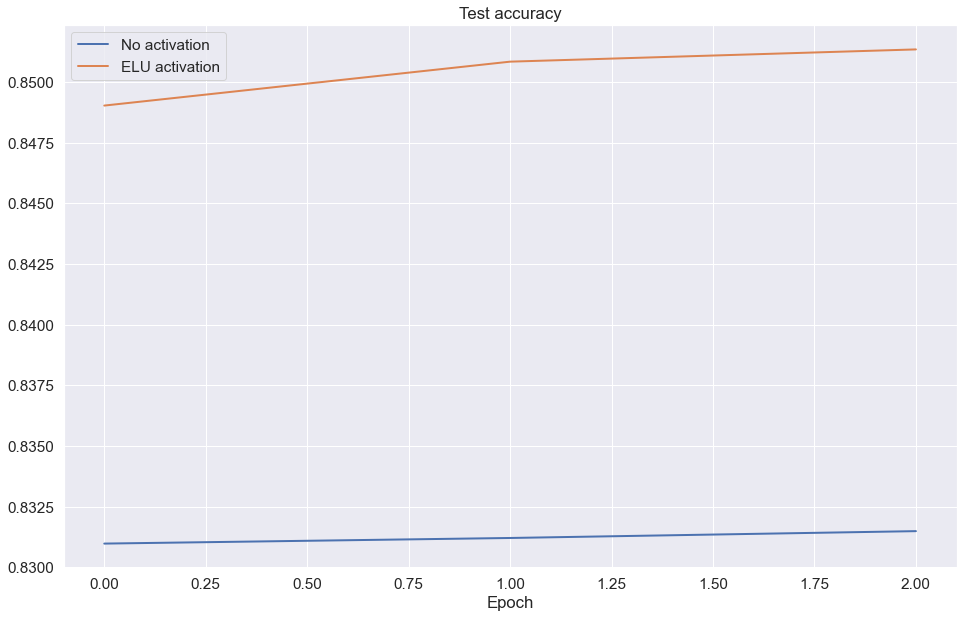

In [37]:
sns.set(style="darkgrid", font_scale=1.4)

x_size = len(roc_auc_identical['test'])

plt.figure(figsize=(16, 10))
plt.title("Test accuracy")
plt.plot(range(x_size), roc_auc_identical['test'], label="No activation", linewidth=2)
plt.plot(range(x_size), roc_auc_elu['test'], label="ELU activation", linewidth=2)
plt.plot(range(x_size), roc_auc_relu['test'], label="ReLU activation", linewidth=2)
plt.plot(range(x_size), roc_auc_leaky_relu['test'], label="LeakyReLU activation", linewidth=2)
plt.plot(range(x_size), roc_auc_tanh['test'], label="tanh activation", linewidth=2)
plt.plot(range(x_size), roc_auc_sigmoid['test'], label="sigmoid activation", linewidth=2)
plt.legend()
plt.xlabel("Epoch")
plt.show()


As we can see here, ELU function is the most effective one for this task (as it usually is). LeakyReLu and ReLU are less better, tanh subjected to overfitting, sigmoid function shows us low roc auc score, and network with no activation function at all (which is in fact linear regression) has the lowest results

In [74]:
predictions = dense_neural_network_elu.predict_proba(X_test)
print("ROC_AUC we can achieve using dense neural network: ", roc_auc_score(y_test, predictions))
pd.DataFrame(predictions).head(10)

Downloaded dataset with size:  (31852, 23)
ROC_AUC we can achieve using dense neural network:  0.8471181032252066


,0
0,0.807385
1,0.689977
2,0.744120
3,0.010447
4,0.550497
5,0.388067
6,0.463060
7,0.042567
8,0.858555
9,0.468414


# Crossover: Stacking

Now, when we have our models trained and analyzed, lets combine them with staking technique. We will create a new dataset and our new features will be models predictions. For staking we will use:

1. Linear regression
2. Catboost
3. XGboost
4. Dense neural network
5. Ensemble [not ready yet]

As a latest models that will work above final predictions-featured dataset will be xgboost

In [84]:
X, y = Split(GetClearData(train_filename, False))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = Scale(X_train, X_test)

0 rows were deleted, 159256 remains


In [203]:
best_params = {'n_estimators': 8500, 'max_depth': 6, 'min_child_weight': 7, 'learning_rate': 0.01562020794850652, 'subsample': 0.9936797243169001, 'colsample_bytree': 0.16999716191331965, 'reg_alpha': 3.4576146388015996, 'reg_lambda': 5.597056682360282, 'gamma': 0.8999999999999999}
xgboost_model = xgb.XGBClassifier(**best_params)
xgboost_model.fit(X_train, y_train)

/home/stepa/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:01:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.16999716191331965,
              enable_categorical=False, gamma=0.8999999999999999, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01562020794850652, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=8500, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=3.4576146388015996,
              reg_lambda=5.597056682360282, scale_pos_weight=1,
              subsample=0.9936797243169001, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [98]:
best_params = {'iterations': 400, 'depth': 7, 'learning_rate': 0.11}
catboost_model = CatBoostClassifier(**best_params, verbose=0, eval_metric='AUC', cat_features=cat_cols)
catboost_model.fit(X_train, y_train)

In [99]:
linear_regression_model = LogisticRegression(C=100.0, max_iter=1000)
linear_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(C=100.0, max_iter=1000)

In [100]:
neural_network_model = NeuralNetwork(num_epochs=1)
neural_network_model.fit(X_train_scaled, y_train, X_train_scaled, y_train)

Downloaded dataset with size:  (127404, 23)
Downloaded dataset with size:  (127404, 23)
Epoch: 1
Loader: train. Accuracy: 0.7634814698492463
Loader: train. roc_auc: 0.8461391852002075
Loader: test. Accuracy: 0.7642509422110553
Loader: test. roc_auc: 0.8510683015555877


{'train': [0.8461391852002075], 'test': [0.8510683015555877]}

In [164]:
class Stacking:
    def __init__(self, models):
        self.models = models
    
    def predict_proba(self, X_test, X_test_scaled):
        predictions = np.array([
            self.models[0].predict_proba(X_test)[:, 1],
            self.models[1].predict_proba(X_test)[:, 1],
            self.models[2].predict_proba(X_test_scaled)[:, 1],
            self.models[3].predict_proba(X_test_scaled)
        ])
        return predictions.T    

In [165]:
stacking = Stacking([xgboost_model, catboost_model, linear_regression_model, neural_network_model])

In [192]:
X_train_stacking = stacking.predict_proba(X_train, X_train_scaled)
pd.concat([pd.DataFrame(X_train_stacking), pd.DataFrame(y_train.values)], axis=1)

Downloaded dataset with size:  (127404, 23)


,0,1,2,3,0
0,0.002533,0.004998,0.022515,0.002708,0
1,0.311626,0.168635,0.386511,0.241157,0
2,0.021685,0.041165,0.095111,0.027860,0
3,0.120059,0.100922,0.151153,0.099177,0
4,0.467759,0.461164,0.440781,0.543151,0
...,...,...,...,...,...
127399,0.602223,0.596586,0.795645,0.770082,1
127400,0.910441,0.894664,0.751369,0.831891,1
127401,0.153114,0.066258,0.161597,0.087234,1
127402,0.131865,0.184813,0.336948,0.348340,0


In [193]:
X_test_stacking = stacking.predict_proba(X_test, X_test_scaled)
pd.concat([pd.DataFrame(X_test_stacking), pd.DataFrame(y_test.values)], axis=1)

Downloaded dataset with size:  (31852, 23)


,0,1,2,3,0
0,0.840603,0.799814,0.804739,0.797584,1
1,0.675496,0.689757,0.785354,0.662109,1
2,0.833149,0.816122,0.664514,0.740615,1
3,0.002876,0.003098,0.033306,0.011139,0
4,0.422784,0.464227,0.522218,0.535242,0
...,...,...,...,...,...
31847,0.372751,0.455722,0.292447,0.368938,1
31848,0.018608,0.024139,0.083369,0.024184,0
31849,0.861131,0.821864,0.925362,0.811740,1
31850,0.709787,0.770438,0.481655,0.671952,0


In [194]:
best_params = {'n_estimators': 8500, 'max_depth': 6, 'min_child_weight': 7, 'learning_rate': 0.01562020794850652, 'subsample': 0.9936797243169001, 'colsample_bytree': 0.16999716191331965, 'reg_alpha': 3.4576146388015996, 'reg_lambda': 5.597056682360282, 'gamma': 0.8999999999999999}
final_xgboost_model = xgb.XGBClassifier(**best_params)
final_xgboost_model.fit(X_train_stacking, y_train)

/home/stepa/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:54:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.16999716191331965,
              enable_categorical=False, gamma=0.8999999999999999, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01562020794850652, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=8500, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=3.4576146388015996,
              reg_lambda=5.597056682360282, scale_pos_weight=1,
              subsample=0.9936797243169001, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [198]:
preds = xgboost_model.predict_proba(X_test_stacking)[:, 1]

pd.DataFrame(preds)

,0
0,0.835104
1,0.699046
2,0.919914
3,0.000604
4,0.338299
...,...
31847,0.430402
31848,0.009990
31849,0.912163
31850,0.824191


In [200]:
roc_auc_score(y_test, preds)

0.8629754753392921

# Final part: getting results

In [204]:
X_train, y_train = Split(GetClearData(train_filename, False))
X_test = GetClearData(test_filename, False)

X_train_scaled, X_test_scaled = Scale(X_train, X_test)

0 rows were deleted, 159256 remains
0 rows were deleted, 106171 remains


In [205]:
stacking = Stacking([xgboost_model, catboost_model, linear_regression_model, neural_network_model])

In [206]:
X_train_stacking = stacking.predict_proba(X_train, X_train_scaled)
pd.concat([pd.DataFrame(X_train_stacking), pd.DataFrame(y_train.values)], axis=1)

Downloaded dataset with size:  (159256, 23)


,0,1,2,3,0
0,0.753769,0.674917,0.842616,0.810427,1
1,0.333190,0.285786,0.588012,0.377899,0
2,0.940905,0.914193,0.862483,0.817084,1
3,0.695740,0.696791,0.867768,0.694518,0
4,0.576351,0.528270,0.440865,0.611095,1
...,...,...,...,...,...
159251,0.017049,0.009267,0.052181,0.025260,0
159252,0.038745,0.036566,0.146568,0.030727,0
159253,0.003719,0.004340,0.024904,0.003692,0
159254,0.674530,0.644670,0.498816,0.639076,1


In [208]:
X_test_stacking = stacking.predict_proba(X_test, X_test_scaled)
pd.DataFrame(X_test_stacking)

Downloaded dataset with size:  (106171, 23)


,0,1,2,3
0,0.646176,0.577186,0.392485,0.589834
1,0.253335,0.103055,0.196437,0.338673
2,0.326017,0.359602,0.635703,0.406051
3,0.032104,0.024899,0.125853,0.058693
4,0.623254,0.491689,0.650709,0.587023
...,...,...,...,...
106166,0.737690,0.577726,0.495644,0.654107
106167,0.540210,0.572138,0.666842,0.668875
106168,0.412677,0.473954,0.408072,0.507633
106169,0.102517,0.094198,0.133300,0.144453


In [209]:
best_params = {'n_estimators': 8500, 'max_depth': 6, 'min_child_weight': 7, 'learning_rate': 0.01562020794850652, 'subsample': 0.9936797243169001, 'colsample_bytree': 0.16999716191331965, 'reg_alpha': 3.4576146388015996, 'reg_lambda': 5.597056682360282, 'gamma': 0.8999999999999999}
final_xgboost_model = xgb.XGBClassifier(**best_params)
final_xgboost_model.fit(X_train_stacking, y_train)

/home/stepa/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:05:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.16999716191331965,
              enable_categorical=False, gamma=0.8999999999999999, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01562020794850652, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=8500, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=3.4576146388015996,
              reg_lambda=5.597056682360282, scale_pos_weight=1,
              subsample=0.9936797243169001, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [210]:
final_pred = xgboost_model.predict_proba(X_test_stacking)[:, 1]

df = pd.DataFrame({'id': range(159256, 265426 + 1),
                   'smoking': final_pred})

df.to_csv(output_name, index=False)

ValueError: Feature shape mismatch, expected: 23, got 4